In [1]:
import warnings
warnings.filterwarnings('ignore')
import operator
import functools
import tensorflow as tf
import numpy as np
from sklearn.metrics import *
import pandas as pd
from math import *
from sklearn.preprocessing import StandardScaler, Imputer
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

### Titanic

#### Priprema Titanic skupa podataka

In [2]:
def titanic_dataset():
    dataset = pd.read_csv("data\\Titanic.csv")
    del dataset["name"]
    del dataset["cabin"]
    del dataset["ticket"]
    del dataset["home.dest"]
    del dataset["body"]
    del dataset["boat"]
    
    for column in ["age", "sibsp", "parch", "fare"]:
        imp = Imputer()
        dataset[column] = imp.fit_transform(dataset[column].values.reshape(-1,1))
    
    dataset["sibsp"] =  dataset["sibsp"].astype(float)
    dataset = pd.get_dummies(dataset, columns=["sex", "embarked"], prefix=["sex", "embarked"])
    
    need_scaling = ["pclass","age", "sibsp", "parch", "fare"]
    scaler = StandardScaler()
    for feature in need_scaling:
        dataset[feature] = scaler.fit_transform(dataset[feature].values.reshape(-1,1))

    return dataset

#### Provjera omjera preživjelih i umrlih:

In [3]:
dataset = titanic_dataset()
print("Dataset shape:", dataset.shape)
print("Survived rate:\n", dataset['survived'].value_counts())

Dataset shape: (1309, 11)
Survived rate:
 0    809
1    500
Name: survived, dtype: int64


In [4]:
dataset.head()

,pclass,survived,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,-1.546098,1,-0.068420,-0.479087,-0.445000,3.442480,1,0,0,0,1
1,-1.546098,1,-2.248837,0.481288,1.866526,2.286476,0,1,0,0,1
2,-1.546098,0,-2.164975,0.481288,1.866526,2.286476,1,0,0,0,1
3,-1.546098,0,0.009230,0.481288,1.866526,2.286476,0,1,0,0,1
4,-1.546098,0,-0.379021,0.481288,1.866526,2.286476,1,0,0,0,1


#### Podjela skupa podataka na "dobre" (preživjele) i "loše" primjere

In [5]:
dataset_good = dataset[dataset['survived'] == 1]
dataset_bad = dataset[dataset['survived'] == 0]
del dataset_good['survived']
del dataset_bad['survived']

print("Dataset_good shape:", dataset_good.shape)
print("Dataset_bad shape:", dataset_bad.shape)

good_rate = 500/1309
bad_rate = 809/1309
print("Survived rate:", good_rate)
print("Deceased rate:", bad_rate)

Dataset_good shape: (500, 10)
Dataset_bad shape: (809, 10)
Survived rate: 0.3819709702062643
Deceased rate: 0.6180290297937356


#### Stratificirana podjela - provjera koliko je potrebno "dobrih" i "loših" primjera u train i test setu. Sampliranje.

In [6]:
train_size = 1009
test_size = 300
print("Number of survived for train:", round(train_size*good_rate))
print("Number of deceased for train:", round(train_size*bad_rate))
print("\nNumber of survived for test:", round(test_size*good_rate))
print("Number of deceased for test:", round(test_size*bad_rate))

sampled_good_tit_train, sampled_good_tit_test = train_test_split(dataset_good, test_size=300/1309)
sampled_bad_tit_train, sampled_bad_tit_test = train_test_split(dataset_bad, test_size=300/1309)
print(sampled_good_tit_train.shape, sampled_good_tit_test.shape, sampled_bad_tit_train.shape, sampled_bad_tit_test.shape)

Number of survived for train: 385
Number of deceased for train: 624

Number of survived for test: 115
Number of deceased for test: 185
(385, 10) (115, 10) (623, 10) (186, 10)


### Credit Card

#### Podjela Credit Card dataseta

<img src="Untitled_Diagram-copy.png">

#### Priprema Credit card skupa podataka

In [19]:
def credit_dataset():
    dataset = pd.read_csv("data\\UCI_Credit_Card.csv")
    del dataset['ID']

    need_scaling = list(filter(functools.partial(operator.ne, 'default.payment.next.month'), dataset.columns.tolist()))
    scaler = StandardScaler()
    for feature in need_scaling:
        dataset[feature] = scaler.fit_transform(dataset[feature].values.reshape(-1,1))
            
    return dataset

#### Provjera omjera defaultnih i nedefaultnih klijenata:

In [20]:
dataset = credit_dataset()
print("Dataset shape:", dataset.shape)
print("Default rate:\n", dataset["default.payment.next.month"].value_counts())

Dataset shape: (30000, 24)
Default rate:
 0    23364
1     6636
Name: default.payment.next.month, dtype: int64


In [21]:
dataset.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,-1.136720,0.810161,0.185828,-1.057295,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.530046,...,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1
1,-0.365981,0.810161,0.185828,0.858557,-1.029047,-0.874991,1.782348,0.138865,0.188746,0.234917,...,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1
2,-0.597202,0.810161,0.185828,0.858557,-0.161156,0.014861,0.111736,0.138865,0.188746,0.234917,...,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,0
3,-0.905498,0.810161,0.185828,-1.057295,0.164303,0.014861,0.111736,0.138865,0.188746,0.234917,...,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,0
4,-0.905498,-1.234323,0.185828,-1.057295,2.334029,-0.874991,0.111736,-0.696663,0.188746,0.234917,...,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,0


#### Podjela skupa podataka na "dobre" (default) i "loše" primjere

In [22]:
dataset_good = dataset[dataset['default.payment.next.month'] == 0]
dataset_bad = dataset[dataset['default.payment.next.month'] == 1]
del dataset_good['default.payment.next.month']
del dataset_bad['default.payment.next.month']
print("Dataset_good shape:", dataset_good.shape)
print("Dataset_bad shape:", dataset_bad.shape)

good_rate = 23364/30000
bad_rate = 6636/30000
print("Non-default rate:", good_rate)
print("Default rate:", bad_rate)

Dataset_good shape: (23364, 23)
Dataset_bad shape: (6636, 23)
Non-default rate: 0.7788
Default rate: 0.2212


#### Stratificirana podjela - provjera koliko je potrebno "dobrih" i "loših" primjera u train i test setu. Sampliranje.

In [24]:
train_size = 20000
test_size = 10000
print("Number of good clients for train:", round(train_size*good_rate))
print("Number of bad clients for train:", round(train_size*bad_rate))
print("\nNumber of good clients for test:", round(test_size*good_rate))
print("Number of bad clients for test:", round(test_size*bad_rate))

sampled_good_cre_train, sampled_good_cre_test = train_test_split(dataset_good, test_size=1/3)
sampled_bad_cre_train, sampled_bad_cre_test = train_test_split(dataset_bad, test_size=1/3)
print(sampled_good_cre_train.shape, sampled_good_cre_test.shape, sampled_bad_cre_train.shape, sampled_bad_cre_test.shape)

Number of good clients for train: 15576
Number of bad clients for train: 4424

Number of good clients for test: 7788
Number of bad clients for test: 2212
(15576, 23) (7788, 23) (4424, 23) (2212, 23)


## Neural Network

<img src="nn.png">

In [7]:
def small_network(input_placeholder):
    layer_1 = tf.layers.dense(input_placeholder, 70, tf.nn.relu, name="layer_1", reuse=tf.AUTO_REUSE)
    layer_2 = tf.layers.dense(layer_1, 60, tf.nn.relu, name="layer_2", reuse=tf.AUTO_REUSE)
    layer_3 = tf.layers.dense(layer_2, 40, tf.nn.relu, name="layer_3", reuse=tf.AUTO_REUSE)
    layer_4 = tf.layers.dense(layer_3, 30, tf.nn.relu, name="layer_4", reuse=tf.AUTO_REUSE)
    layer_5 = tf.layers.dense(layer_4, 15, tf.nn.relu, name="layer_5", reuse=tf.AUTO_REUSE)
    output = tf.layers.dense(layer_5, 1, name="output", reuse=tf.AUTO_REUSE)
    return output

In [8]:
def plot_roc(y, out):
    fpr, tpr, threshold = roc_curve(y, out)
    roc_auc = auc(fpr, tpr)

    plt.title('ROC')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.legend(loc = 'lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [9]:
def metrics(y_out, y_test):
    y_out = [o >= 0.5 for o in y_out]
    print('\nAccuracy score = ', accuracy_score(y_test, y_out))
    print('Precision score = ', precision_score(y_test, y_out))
    print('Recall score = ', recall_score(y_test, y_out))
    print('F1 score = ', f1_score(y_test, y_out))

In [15]:
def plot_loss(losses, num_epochs):
    plt.title('Loss')
    plt.plot(range(1,num_epochs+1),losses, 'b')
    plt.xlim([0, num_epochs+1])
    plt.ylim([0, 0.8])
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.show()

### Train & test

In [25]:
tf.reset_default_graph()
num_features = sampled_good_cre_train.shape[1] #ili sampled_good_tit_train.shape[1]

input_left = tf.placeholder(tf.float32, shape=[None, num_features*2])
input_right = tf.concat([input_left[:, num_features:], input_left[:, :num_features]], axis=1)
output = tf.placeholder(tf.float32, shape=[None,1])

f_left = small_network(input_left)
f_right = small_network(input_right)
logit = f_left - f_right

h = tf.sigmoid(logit)

loss = tf.losses.sigmoid_cross_entropy(output, logit)
lr = tf.placeholder(tf.float32, shape=[])
train_op = tf.train.AdamOptimizer(learning_rate=lr, beta1=0.9, beta2=0.999).minimize(loss)

In [17]:
def train_test(good_data, bad_data, num_epochs=25, l_rate = 0.001, num_batches=15):
    bsize_good = len(good_data) // num_batches
    bsize_bad = len(bad_data) // num_batches
    losses = []
    
    for epoch in range(num_epochs):
        total_loss = 0.0
        good_data = shuffle(good_data)
        bad_data = shuffle(bad_data)
        
        h_out = []
        y = []
            
        for batch in range(num_batches):
            y_ = []
            h_o = []
            minibatch = []

            for i in range(batch * bsize_good, (batch + 1) * bsize_good):
                for j in range(batch * bsize_bad, (batch + 1) * bsize_bad):
                    g = good_data.iloc[i,:].reshape(1,-1)
                    b = bad_data.iloc[j,:].reshape(1,-1)
                    minibatch.append(np.concatenate((g, b), axis=None))
                    minibatch.append(np.concatenate((b, g), axis=None))
                    y_.extend([1,0])

            y.extend(y_)
            loss_, h_, _ = sess.run([loss, h, train_op], feed_dict={input_left: np.array(minibatch),
                                                                    output: np.array(y_).reshape(-1,1),
                                                                    lr: l_rate})
            h_out.extend([hh[0] for hh in h_])
            total_loss += loss_

        print("Epoch {} / {}, Loss = {}".format(epoch + 1, num_epochs, total_loss / num_batches))
        losses.append(total_loss / num_batches)
    return h_out, y, losses

Training...
Epoch 1 / 25, Loss = 0.5798678239186604
Epoch 2 / 25, Loss = 0.4092308362325033
Epoch 3 / 25, Loss = 0.3492324988047282
Epoch 4 / 25, Loss = 0.33139943579832715
Epoch 5 / 25, Loss = 0.33340013523896533
Epoch 6 / 25, Loss = 0.3115519732236862
Epoch 7 / 25, Loss = 0.3175459067026774
Epoch 8 / 25, Loss = 0.3172015110651652
Epoch 9 / 25, Loss = 0.3102011442184448
Epoch 10 / 25, Loss = 0.3118891815344493
Epoch 11 / 25, Loss = 0.29780841221412024
Epoch 12 / 25, Loss = 0.2989668140808741
Epoch 13 / 25, Loss = 0.292875408132871
Epoch 14 / 25, Loss = 0.2887328177690506
Epoch 15 / 25, Loss = 0.29223213096459705
Epoch 16 / 25, Loss = 0.28910680214564005
Epoch 17 / 25, Loss = 0.2942157775163651
Epoch 18 / 25, Loss = 0.287120229502519
Epoch 19 / 25, Loss = 0.27910334169864653
Epoch 20 / 25, Loss = 0.28076679607232413
Epoch 21 / 25, Loss = 0.274069611231486
Epoch 22 / 25, Loss = 0.27361874183019
Epoch 23 / 25, Loss = 0.27491488854090373
Epoch 24 / 25, Loss = 0.2713438739379247
Epoch 25 /

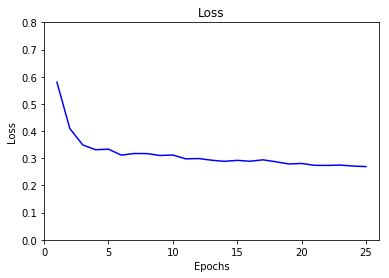


Testing...
Epoch 1 / 1, Loss = 0.33403956654171146

Accuracy score =  0.8583333333333333
Precision score =  0.8580491673275178
Recall score =  0.8587301587301587
F1 score =  0.8583895279650932
Area under curve = 	 0.9336341017888637


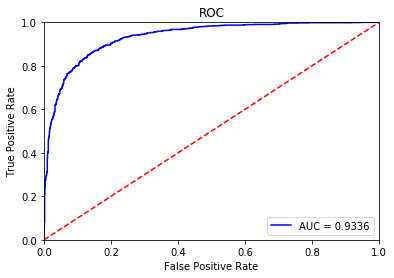

In [18]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    print("Training...")
    out, y, losses = train_test(num_epochs=25, good_data = sampled_good_tit_train, bad_data = sampled_bad_tit_train)
    metrics(out, y)
    plot_loss(losses, num_epochs=25)
    
    print("\nTesting...")
    out, y, losses = train_test(num_epochs=1, good_data=sampled_good_tit_test, bad_data=sampled_bad_tit_test)
    metrics(out, y)
    print('Area under curve = \t', roc_auc_score(y_true=y, y_score=out))
    plot_roc(y, out)

Training...
Epoch 1 / 50, Loss = 0.5132381139472127
Epoch 2 / 50, Loss = 0.48153364892303946
Epoch 3 / 50, Loss = 0.47325021533668044
Epoch 4 / 50, Loss = 0.46751086067035796
Epoch 5 / 50, Loss = 0.4602597905900329
Epoch 6 / 50, Loss = 0.4615394671112299
Epoch 7 / 50, Loss = 0.45548017067462204
Epoch 8 / 50, Loss = 0.4521973257996142
Epoch 9 / 50, Loss = 0.4481410579830408
Epoch 10 / 50, Loss = 0.44678367603942754
Epoch 11 / 50, Loss = 0.44329895166680217
Epoch 12 / 50, Loss = 0.4428083058707416
Epoch 13 / 50, Loss = 0.44197132569923997
Epoch 14 / 50, Loss = 0.44037002154067156
Epoch 15 / 50, Loss = 0.4371940031647682
Epoch 16 / 50, Loss = 0.4323515800703317
Epoch 17 / 50, Loss = 0.43211443510651587
Epoch 18 / 50, Loss = 0.43346264884620905
Epoch 19 / 50, Loss = 0.43452046273648737
Epoch 20 / 50, Loss = 0.4258452397994697
Epoch 21 / 50, Loss = 0.42432866848632694
Epoch 22 / 50, Loss = 0.4189326133392751
Epoch 23 / 50, Loss = 0.41601222070306537
Epoch 24 / 50, Loss = 0.41304267567023634

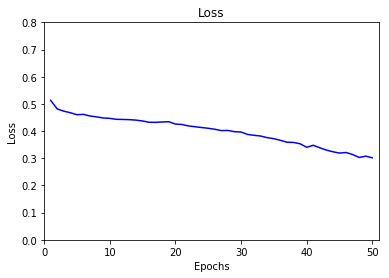


Testing...
Epoch 1 / 1, Loss = 0.5182324592620134

Accuracy score =  0.7493571428571428
Precision score =  0.7493571428571428
Recall score =  0.7493571428571428
F1 score =  0.7493571428571428
Area under curve = 	 0.829525193877551


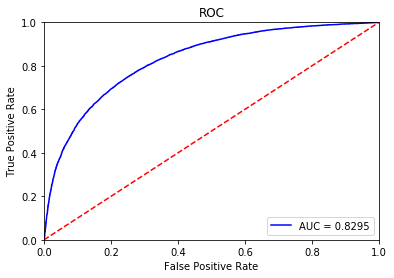

In [28]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    print("Training...")
    out, y, losses = train_test(num_epochs = 50, num_batches = 1000, good_data = sampled_good_cre_train, bad_data = sampled_bad_cre_train)
    metrics(out, y)
    plot_loss(losses, num_epochs=50)
    
    print("\nTesting...")
    out, y, losses = train_test(num_epochs=1, num_batches = 1000, good_data=sampled_good_cre_test, bad_data=sampled_bad_cre_test)
    metrics(out, y)
    print('Area under curve = \t', roc_auc_score(y_true=y, y_score=out))
    plot_roc(y, out)